# Proyecto de Ciclo de vida de los datos

### Preparado por:
- Fernando
- Eduardo
- Cédric
- Nicolò

fichero original:

https://datosabiertos.malaga.eu/recursos/ambiente/calidadaire/2018.json

In [1]:
# Load the Pandas libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
    
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
calidad_aire = pd.read_csv("calidad_aire_2018.csv") 
    
# Preview the first 5 lines of the loaded data 
calidad_aire.head()
list(calidad_aire)

# Remove repeated/useless columns 
calidad_aire = calidad_aire.drop(calidad_aire.columns[[0,1,2,3,4,5,6,7,8,11,18]], axis=1)

calidad_aire.head()

geometry/coordinates/0/4/0  geometry/coordinates/0/4/1  \
0                   -4.439850                   36.698456   
1                   -4.428864                   36.709442   
2                   -4.340973                   36.717682   
3                   -4.424744                   36.734161   
4                   -4.496155                   36.701202   

  properties/co_F_level properties/pm1_F_level properties/pm1_level  \
0                  good          unhealthy-low        unhealthy-low   
1                  good          unhealthy-low        unhealthy-low   
2                  good               moderate             moderate   
3                  good         unhealthy-high       unhealthy-high   
4                  good                    NaN       unhealthy-high   

   properties/no2_F  properties/no2 properties/co_level  properties/pm1_F  \
0              16.0            16.0                good               6.0   
1              55.0            55.0                good               6.0   
2              24.0            24.0                good               3.0   
3              21.0            21.0                good              18.0   
4              14.0            14.0                good              15.0   

   properties/co  ...  properties/pm10_APP_level  properties/pm10_M  \
0            7.0  ...                        NaN                NaN   
1           99.0  ...                       good               14.0   
2            2.0  ...                        NaN                NaN   
3          721.0  ...                       good               14.0   
4          172.0  ...                       good               15.0   

  properties/iuca.level_M_global  properties/o3_M  properties/pm25_M  \
0                            NaN              NaN                NaN   
1                       moderate              0.0               11.0   
2                            NaN              NaN                NaN   
3                       moderate              1.0               12.0   
4                       moderate              6.0               13.0   

  properties/count_M properties/pm10_M_level properties/pm1_M_level  \
0                NaN                     NaN                    NaN   
1               30.0                    good          unhealthy-low   
2                NaN                     NaN                    NaN   
3              710.0                    good          unhealthy-low   
4              213.0                     NaN          unhealthy-low   

   properties/co_M  properties/co_APP_level  
0              NaN                      NaN  
1             64.0           unhealthy-high  
2              NaN                      NaN  
3             60.0                     good  
4            149.0            unhealthy-low  

[5 rows x 51 columns]

In [2]:
list(calidad_aire)[2:]

['properties/co_F_level',
 'properties/pm1_F_level',
 'properties/pm1_level',
 'properties/no2_F',
 'properties/no2',
 'properties/co_level',
 'properties/pm1_F',
 'properties/co',
 'properties/o3_F',
 'properties/count_SMAQ',
 'properties/o3_level',
 'properties/pm25',
 'properties/pm1',
 'properties/pm10_F_level',
 'properties/iuca.level_F_global',
 'properties/pm25_F_level',
 'properties/count_F',
 'properties/pm25_F',
 'properties/no2_F_level',
 'properties/count',
 'properties/iuca.level_global',
 'properties/pm10_level',
 'properties/co_F',
 'properties/pm10',
 'properties/o3',
 'properties/pm10_F',
 'properties/o3_F_level',
 'properties/no2_level',
 'properties/pm25_level',
 'properties/no2_M_level',
 'properties/resp_APP_level',
 'properties/iuca.level_APP_global',
 'properties/no2_M',
 'properties/pm25_M_level',
 'properties/o3_M_level',
 'properties/co_M_level',
 'properties/pm1_M',
 'properties/count_APP',
 'properties/iaq_APP_level',
 'properties/pm10_APP_level',
 'properti

In [3]:
droplist = calidad_aire.dtypes != object
droplist[0:2] = False
droplist

geometry/coordinates/0/4/0          False
geometry/coordinates/0/4/1          False
properties/co_F_level               False
properties/pm1_F_level              False
properties/pm1_level                False
properties/no2_F                     True
properties/no2                       True
properties/co_level                 False
properties/pm1_F                     True
properties/co                        True
properties/o3_F                      True
properties/count_SMAQ                True
properties/o3_level                 False
properties/pm25                      True
properties/pm1                       True
properties/pm10_F_level             False
properties/iuca.level_F_global      False
properties/pm25_F_level             False
properties/count_F                   True
properties/pm25_F                    True
properties/no2_F_level              False
properties/count                     True
properties/iuca.level_global        False
properties/pm10_level             

In [4]:
calidad_aire_num = calidad_aire.drop(calidad_aire.columns[calidad_aire.dtypes == object], axis=1)
calidad_aire_num.head()

geometry/coordinates/0/4/0  geometry/coordinates/0/4/1  properties/no2_F  \
0                   -4.439850                   36.698456              16.0   
1                   -4.428864                   36.709442              55.0   
2                   -4.340973                   36.717682              24.0   
3                   -4.424744                   36.734161              21.0   
4                   -4.496155                   36.701202              14.0   

   properties/no2  properties/pm1_F  properties/co  properties/o3_F  \
0            16.0               6.0            7.0             10.0   
1            55.0               6.0           99.0              5.0   
2            24.0               3.0            2.0             12.0   
3            21.0              18.0          721.0              7.0   
4            14.0              15.0          172.0              3.0   

   properties/count_SMAQ  properties/pm25  properties/pm1  ...  properties/o3  \
0               251521.0             10.0             6.0  ...           10.0   
1               248629.0              9.0             6.0  ...            5.0   
2               242008.0              5.0             3.0  ...           12.0   
3                37305.0            148.0            18.0  ...            6.0   
4                33589.0             22.0            15.0  ...            3.0   

   properties/pm10_F  properties/no2_M  properties/pm1_M  \
0               21.0               NaN               NaN   
1               21.0               8.0               6.0   
2               15.0               NaN               NaN   
3               31.0               7.0               7.0   
4               25.0               0.0               9.0   

   properties/count_APP  properties/pm10_M  properties/o3_M  \
0                   NaN                NaN              NaN   
1                   3.0               14.0              0.0   
2                   NaN                NaN              NaN   
3                 106.0               14.0              1.0   
4                 369.0               15.0              6.0   

   properties/pm25_M  properties/count_M  properties/co_M  
0                NaN                 NaN              NaN  
1               11.0                30.0             64.0  
2                NaN                 NaN              NaN  
3               12.0               710.0             60.0  
4               13.0               213.0            149.0  

[5 rows x 25 columns]

In [101]:
droplist = calidad_aire.dtypes != object
droplist[0:2] = False
droplist

calidad_aire_obj = calidad_aire.drop(calidad_aire.columns[droplist], axis=1)

calidad_aire_obj.head()

geometry/coordinates/0/4/0  geometry/coordinates/0/4/1  \
0                   -4.439850                   36.698456   
1                   -4.428864                   36.709442   
2                   -4.340973                   36.717682   
3                   -4.424744                   36.734161   
4                   -4.496155                   36.701202   

  properties/co_F_level properties/pm1_F_level properties/pm1_level  \
0                  good          unhealthy-low        unhealthy-low   
1                  good          unhealthy-low        unhealthy-low   
2                  good               moderate             moderate   
3                  good         unhealthy-high       unhealthy-high   
4                  good                    NaN       unhealthy-high   

  properties/co_level properties/o3_level properties/pm10_F_level  \
0                good                good                moderate   
1                good                good                moderate   
2                good                good                moderate   
3                good                good           unhealthy-low   
4                good                good                moderate   

  properties/iuca.level_F_global properties/pm25_F_level  ...  \
0                       moderate                moderate  ...   
1                       moderate                    good  ...   
2                       moderate                    good  ...   
3                 unhealthy-high          unhealthy-high  ...   
4                  unhealthy-low           unhealthy-low  ...   

  properties/iuca.level_APP_global properties/pm25_M_level  \
0                              NaN                     NaN   
1                   unhealthy-high                moderate   
2                              NaN                     NaN   
3                        unhealthy                moderate   
4                    unhealthy-low                moderate   

  properties/o3_M_level properties/co_M_level properties/iaq_APP_level  \
0                   NaN                   NaN                      NaN   
1                  good                  good                     good   
2                   NaN                   NaN                      NaN   
3                  good                  good                     good   
4                  good                  good            unhealthy-low   

  properties/pm10_APP_level properties/iuca.level_M_global  \
0                       NaN                            NaN   
1                      good                       moderate   
2                       NaN                            NaN   
3                      good                       moderate   
4                      good                       moderate   

  properties/pm10_M_level properties/pm1_M_level properties/co_APP_level  
0                     NaN                    NaN                     NaN  
1                    good          unhealthy-low          unhealthy-high  
2                     NaN                    NaN                     NaN  
3                    good          unhealthy-low                    good  
4                     NaN          unhealthy-low           unhealthy-low  

[5 rows x 28 columns]

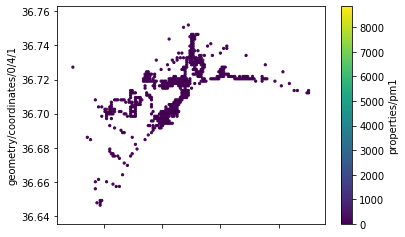

In [6]:
# Pinto una variable numerica: BIEN

calidad_aire_num.plot.scatter(x = 'geometry/coordinates/0/4/0', 
            y = 'geometry/coordinates/0/4/1', 
            c = 'properties/pm1',
            colormap='viridis',
            s = 5)

In [7]:
all_z_variables = list(calidad_aire)[3:]
print(all_z_variables)

['properties/pm1_F_level', 'properties/pm1_level', 'properties/no2_F', 'properties/no2', 'properties/co_level', 'properties/pm1_F', 'properties/co', 'properties/o3_F', 'properties/count_SMAQ', 'properties/o3_level', 'properties/pm25', 'properties/pm1', 'properties/pm10_F_level', 'properties/iuca.level_F_global', 'properties/pm25_F_level', 'properties/count_F', 'properties/pm25_F', 'properties/no2_F_level', 'properties/count', 'properties/iuca.level_global', 'properties/pm10_level', 'properties/co_F', 'properties/pm10', 'properties/o3', 'properties/pm10_F', 'properties/o3_F_level', 'properties/no2_level', 'properties/pm25_level', 'properties/no2_M_level', 'properties/resp_APP_level', 'properties/iuca.level_APP_global', 'properties/no2_M', 'properties/pm25_M_level', 'properties/o3_M_level', 'properties/co_M_level', 'properties/pm1_M', 'properties/count_APP', 'properties/iaq_APP_level', 'properties/pm10_APP_level', 'properties/pm10_M', 'properties/iuca.level_M_global', 'properties/o3_M', 

properties/o3_F
properties/count_SMAQ
properties/pm25
properties/pm1
properties/count_F
properties/pm25_F
properties/count
properties/co_F
properties/pm10
properties/o3
properties/pm10_F
properties/no2_M
properties/pm1_M
properties/count_APP
properties/pm10_M
properties/o3_M
properties/pm25_M
properties/count_M
properties/co_M


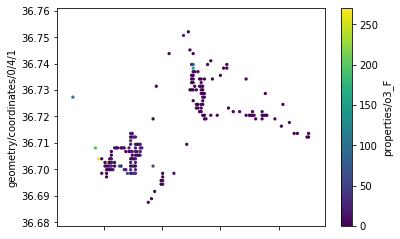

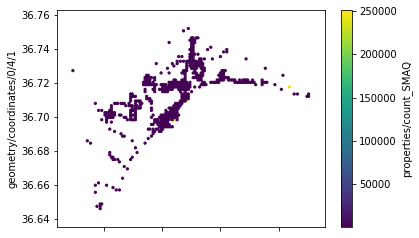

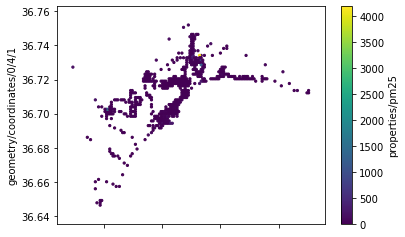

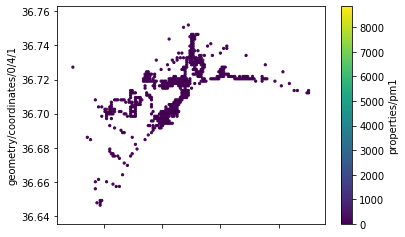

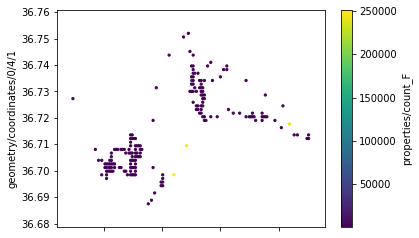

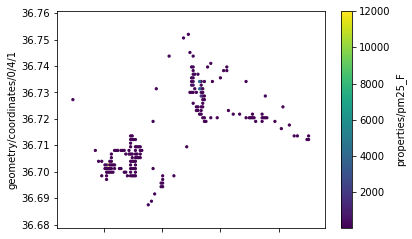

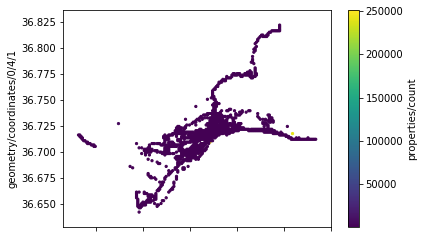

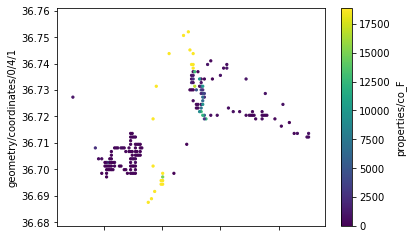

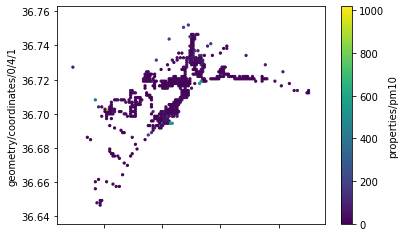

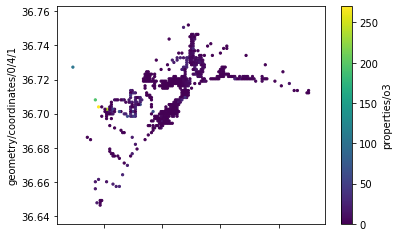

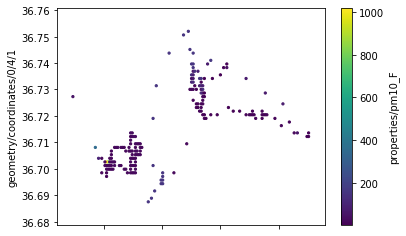

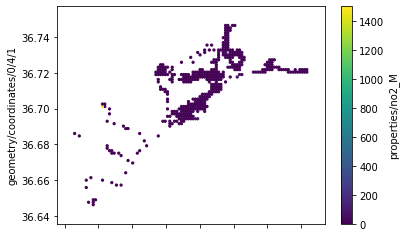

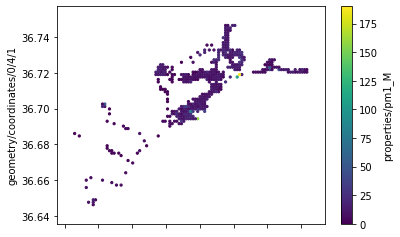

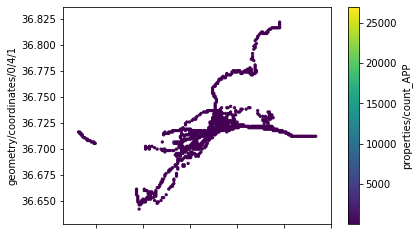

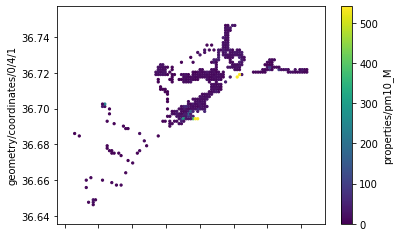

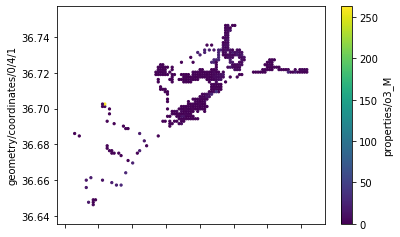

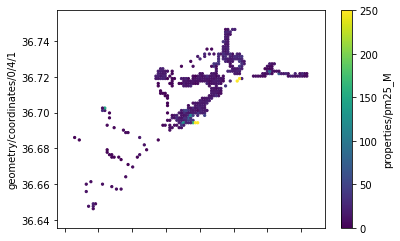

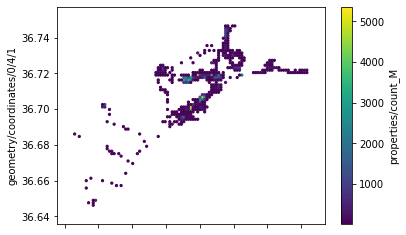

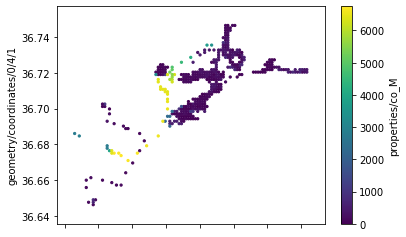

In [8]:
# Intento hacer un loop sobre todas las variables numericas BIEN!

for var in calidad_aire_num.columns[6:]:

    print(var)    
    
    df_tmp = calidad_aire_num[['geometry/coordinates/0/4/0','geometry/coordinates/0/4/1',var]]
    df_tmp.dropna(how='any')
    
    #calidad_aire_num.plot.
    df_tmp.plot.scatter(x = 'geometry/coordinates/0/4/0', 
            y = 'geometry/coordinates/0/4/1', 
            c = var, #calidad_aire['properties/pm1'], #'properties/pm1',
            colormap='viridis',
            s = 5)

In [9]:
# Lista de colores para mapear con los valores de la variable
color = np.array(['green','olivedrab','darkgoldenrod','orange','red',"purple"])
# Lista de valores de la variable cada una tiene un color
category = np.array(['good', 'moderate', 'unhealthy-low','unhealthy', 'unhealthy-high', 'nan'])
# Diccionario que mapea el valor de la variable como clave y el color como valor de la clave
dictCol = dict(zip(category, color))

# Método al que se le pasa un valor(clave) y obtiene su color asociado
def attribute_color(valor):
    # Si el valor pasado es un nan se detecta como float y se devuelve su color asociado
    if isinstance(valor, float):
        return dictCol.get(str(valor))
    else:
        return dictCol.get(valor)

/home/nicolo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


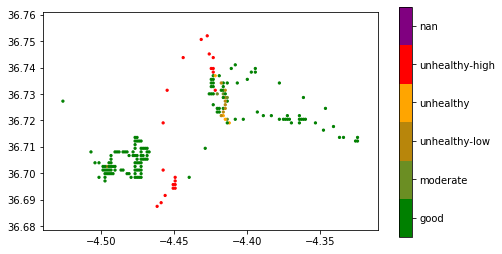

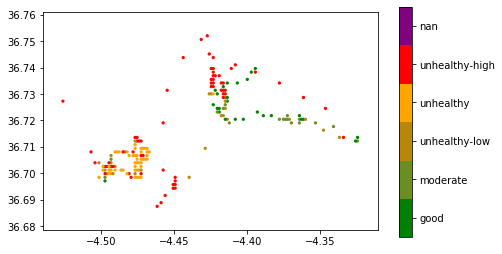

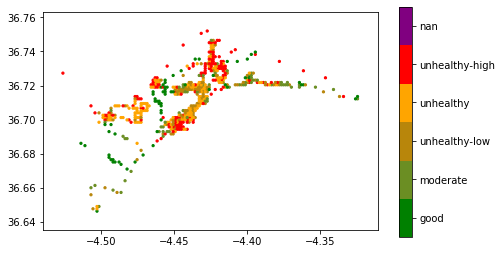

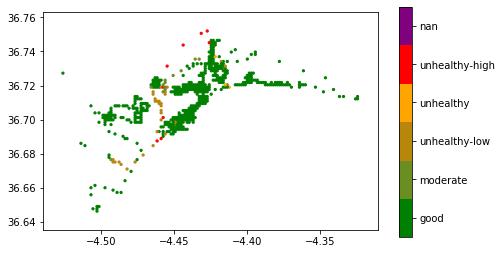

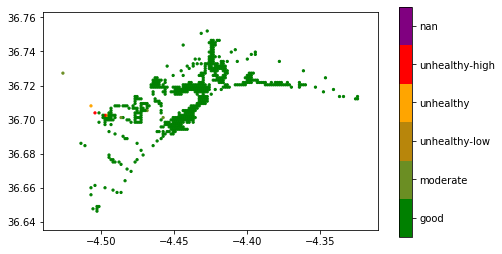

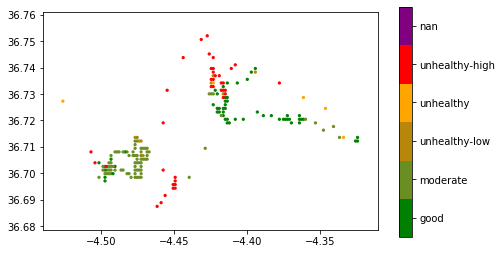

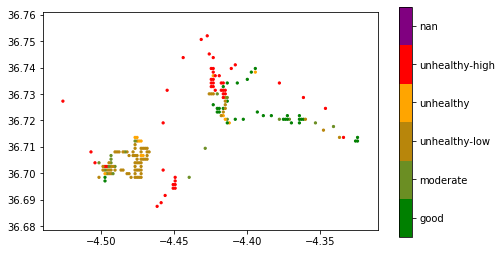

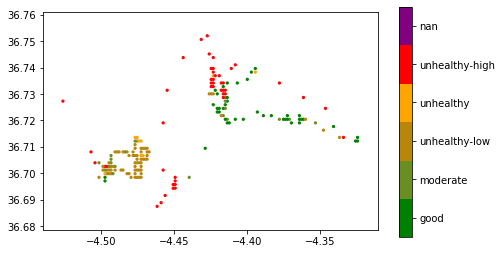

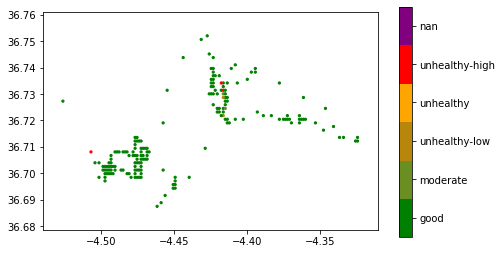

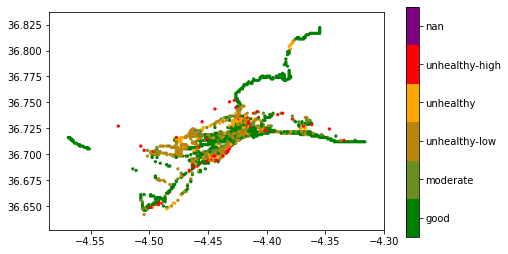

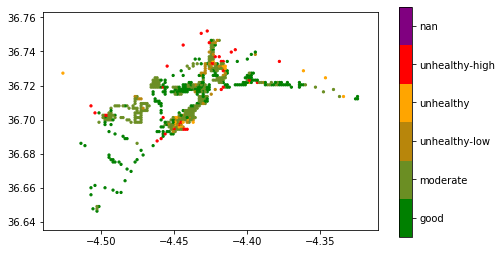

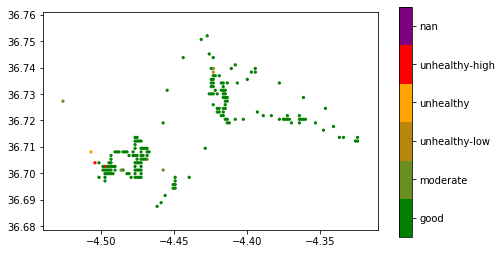

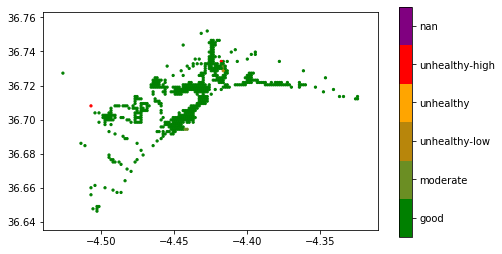

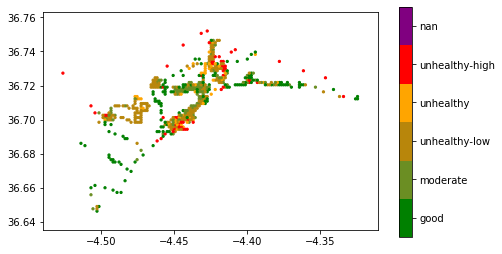

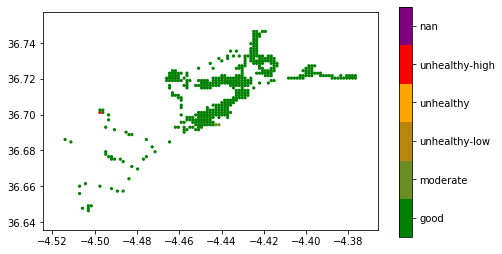

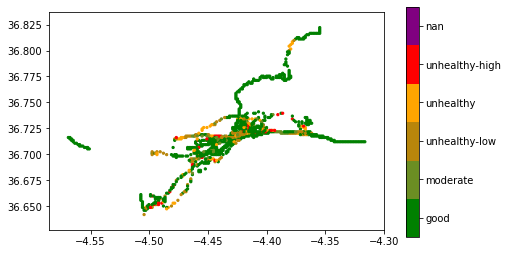

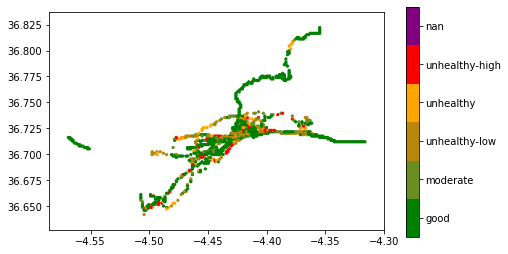

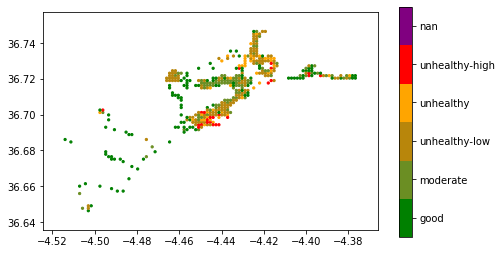

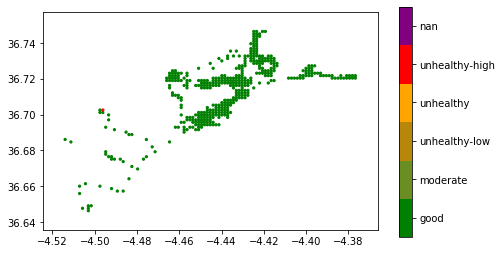

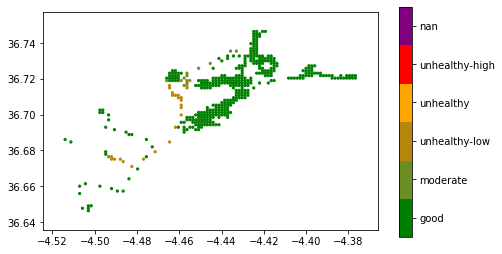

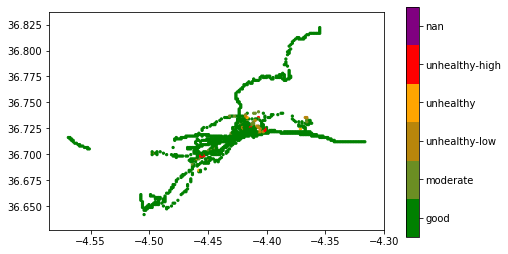

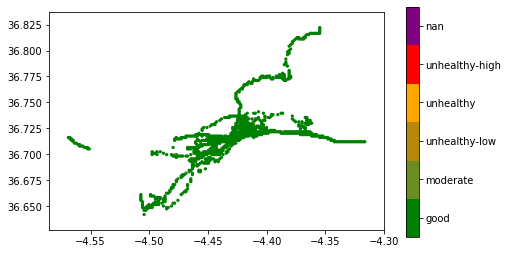

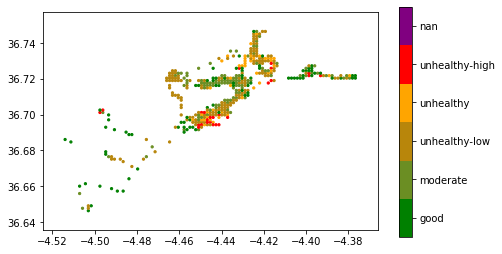

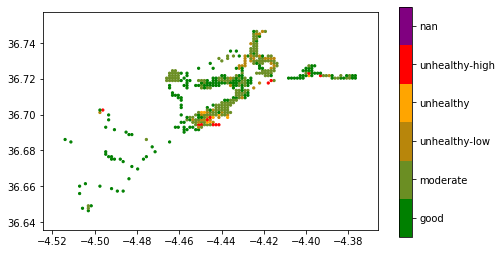

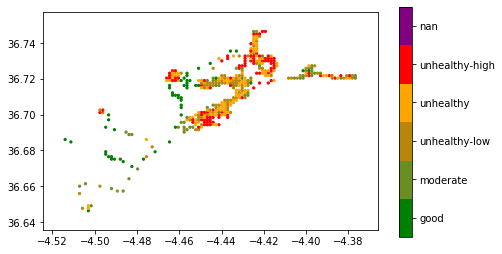

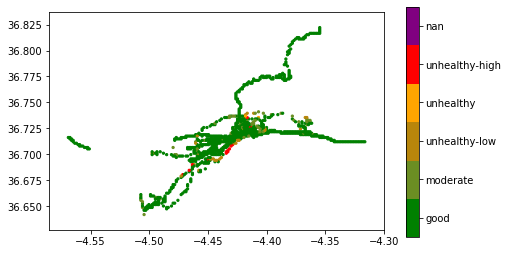

In [10]:
# Intento hacer un loop sobre todas las variables categoricas

#Crea el eje de la barra de color
bounds = np.linspace(0,7,7)
# Mapa de colores
cmap = mpl.colors.ListedColormap(color)

# Pinto solo la primera variable, no se si las demás tienen los mismos valores discretos.
for var in calidad_aire_obj.columns[2:]:

    # Variables que contiene el plotteo
    fig, ax = plt.subplots()

    df_tmp = calidad_aire_obj[['geometry/coordinates/0/4/0','geometry/coordinates/0/4/1',var]]
    df_tmp = df_tmp.dropna(how = 'any')
    
    # Cada observación de la variable se le asigna un color respecto a su valor discreto y se crea una lista de colores.
    color_variable = list()
    for i in df_tmp.index: #range(len(df_tmp[var])):
        color_variable.append(attribute_color(df_tmp[var][i]))
    # La lista de colores será la que se le pase al scatter plot en el parámetro c.
    ax.scatter(x = df_tmp['geometry/coordinates/0/4/0'], 
        y = df_tmp['geometry/coordinates/0/4/1'], 
        c = color_variable,#calidad_aire['properties/pm1'], #'properties/pm1',
        s = 5)
    
    # Situa la barra de color
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    # Crea la barra de color
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
    # Define la posición de los ticks de la barra de color y las etiquetas a usar
    cb.set_ticks(cb.get_ticks()+0.589)
    cb.set_ticklabels(category)
    
    #plt.scatter(x,y, c=colors[z])

In [106]:
calidad_aire_obj.head()

geometry/coordinates/0/4/0  geometry/coordinates/0/4/1  \
0                   -4.439850                   36.698456   
1                   -4.428864                   36.709442   
2                   -4.340973                   36.717682   
3                   -4.424744                   36.734161   
4                   -4.496155                   36.701202   

  properties/co_F_level properties/pm1_F_level properties/pm1_level  \
0                  good          unhealthy-low        unhealthy-low   
1                  good          unhealthy-low        unhealthy-low   
2                  good               moderate             moderate   
3                  good         unhealthy-high       unhealthy-high   
4                  good                    NaN       unhealthy-high   

  properties/co_level properties/o3_level properties/pm10_F_level  \
0                good                good                moderate   
1                good                good                moderate   
2                good                good                moderate   
3                good                good           unhealthy-low   
4                good                good                moderate   

  properties/iuca.level_F_global properties/pm25_F_level  ...  \
0                       moderate                moderate  ...   
1                       moderate                    good  ...   
2                       moderate                    good  ...   
3                 unhealthy-high          unhealthy-high  ...   
4                  unhealthy-low           unhealthy-low  ...   

  properties/iuca.level_APP_global properties/pm25_M_level  \
0                              NaN                     NaN   
1                   unhealthy-high                moderate   
2                              NaN                     NaN   
3                        unhealthy                moderate   
4                    unhealthy-low                moderate   

  properties/o3_M_level properties/co_M_level properties/iaq_APP_level  \
0                   NaN                   NaN                      NaN   
1                  good                  good                     good   
2                   NaN                   NaN                      NaN   
3                  good                  good                     good   
4                  good                  good            unhealthy-low   

  properties/pm10_APP_level properties/iuca.level_M_global  \
0                       NaN                            NaN   
1                      good                       moderate   
2                       NaN                            NaN   
3                      good                       moderate   
4                      good                       moderate   

  properties/pm10_M_level properties/pm1_M_level properties/co_APP_level  
0                     NaN                    NaN                     NaN  
1                    good          unhealthy-low          unhealthy-high  
2                     NaN                    NaN                     NaN  
3                    good          unhealthy-low                    good  
4                     NaN          unhealthy-low           unhealthy-low  

[5 rows x 28 columns]

In [107]:
# Quiero pasar de variables categoricas a numeros.
# e.g. Unhealthy-high = 0, Unhealthy = 1

calidad_aire_obj_num = calidad_aire_obj.copy()
calidad_aire_obj_num.head()


calidad_aire_obj_num.iloc[:,2:] = 0  
calidad_aire_obj_num.head()

calidad_aire_obj_num[calidad_aire_obj.iloc[:,2:] == 'good'] = 4
calidad_aire_obj_num[calidad_aire_obj.iloc[:,2:] == 'moderate'] = 3
calidad_aire_obj_num[calidad_aire_obj.iloc[:,2:] == 'unhealthy-low'] = 2
calidad_aire_obj_num[calidad_aire_obj.iloc[:,2:] == 'unhealthy'] = 1
calidad_aire_obj_num[calidad_aire_obj.iloc[:,2:] == 'unhealthy-high'] = 0


calidad_aire_obj_num.head()

geometry/coordinates/0/4/0  geometry/coordinates/0/4/1  \
0                   -4.439850                   36.698456   
1                   -4.428864                   36.709442   
2                   -4.340973                   36.717682   
3                   -4.424744                   36.734161   
4                   -4.496155                   36.701202   

   properties/co_F_level  properties/pm1_F_level  properties/pm1_level  \
0                      4                       2                     2   
1                      4                       2                     2   
2                      4                       3                     3   
3                      4                       0                     0   
4                      4                       0                     0   

   properties/co_level  properties/o3_level  properties/pm10_F_level  \
0                    4                    4                        3   
1                    4                    4                        3   
2                    4                    4                        3   
3                    4                    4                        2   
4                    4                    4                        3   

   properties/iuca.level_F_global  properties/pm25_F_level  ...  \
0                               3                        3  ...   
1                               3                        4  ...   
2                               3                        4  ...   
3                               0                        0  ...   
4                               2                        2  ...   

   properties/iuca.level_APP_global  properties/pm25_M_level  \
0                                 0                        0   
1                                 0                        3   
2                                 0                        0   
3                                 1                        3   
4                                 2                        3   

   properties/o3_M_level  properties/co_M_level  properties/iaq_APP_level  \
0                      0                      0                         0   
1                      4                      4                         4   
2                      0                      0                         0   
3                      4                      4                         4   
4                      4                      4                         2   

   properties/pm10_APP_level  properties/iuca.level_M_global  \
0                          0                               0   
1                          4                               3   
2                          0                               0   
3                          4                               3   
4                          4                               3   

   properties/pm10_M_level  properties/pm1_M_level  properties/co_APP_level  
0                        0                       0                        0  
1                        4                       2                        0  
2                        0                       0                        0  
3                        4                       2                        4  
4                        0                       2                        2  

[5 rows x 28 columns]

In [12]:
# Intento hacer un loop sobre todas las variables categoricas

for var in calidad_aire_obj.columns[2:]:

    print(calidad_aire_obj[var].unique())    
    colors = np.array(calidad_aire_obj[var].unique())
    
    df_tmp = calidad_aire_obj[['geometry/coordinates/0/4/0','geometry/coordinates/0/4/1',var]]
    df_tmp.dropna(how='any')

    #calidad_aire
    df_tmp.plot.scatter(x = 'geometry/coordinates/0/4/0', 
        y = 'geometry/coordinates/0/4/1', 
        c = colors[var], #calidad_aire['properties/pm1'], #'properties/pm1',
        colormap='viridis',
        s = 5)
    
    
# https://stackoverflow.com/questions/52108558/how-does-parameters-c-and-cmap-behave-in-a-matplotlib-scatter-plot
#plt.scatter(x,y, c=colors[z])

['good' 'unhealthy-high' nan 'moderate' 'unhealthy-low' 'unhealthy']


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
uso_bici = pd.read_csv("bici_pc.csv",
                       sep = ';',
                       skiprows = 4)
uso_bici